In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

## Tabla resumen con información a nivel hogar

Esta tabla contiene las variables construidas, a partir de las 11 tablas de la base de datos, que permiten tener agrupada la información con la cual se obtienen los principales tabulados que el INEGI construye.

`CB`

In [2]:
file = "../../../../../../dataframes/envipe/df_09_concat.csv"


In [3]:
df = pd.read_csv(file)

In [4]:
df.shape

(6203, 167)

In [5]:
df_copy = df.copy()

In [6]:
df_copy.head()

,AP4_1,AP4_10_01,AP4_10_02,AP4_10_03,AP4_10_04,AP4_10_05,AP4_10_06,AP4_10_07,AP4_10_08,AP4_10_09,...,AP5_7_1,AP5_7_2,AP5_7_3,AP5_7_4,AP5_8,CVE_ENT,CVE_MUN,EDAD,ESTRATO,SEXO
0,3,1,3,2,2,2,2,3,2,2,...,2.0,NaN,2.0,1.0,4,9,2,65,3,2
1,3,1,3,2,2,2,1,3,2,1,...,2.0,NaN,2.0,1.0,4,9,2,27,3,2
2,3,1,3,1,1,2,2,3,1,1,...,1.0,NaN,1.0,NaN,4,9,2,57,3,2
3,3,1,3,1,1,1,1,3,1,1,...,1.0,NaN,1.0,1.0,3,9,2,63,3,1
4,3,2,3,2,1,1,2,3,2,1,...,2.0,NaN,1.0,1.0,4,9,2,61,3,1


In [7]:
df_copy.columns

Index(['AP4_1', 'AP4_10_01', 'AP4_10_02', 'AP4_10_03', 'AP4_10_04',
       'AP4_10_05', 'AP4_10_06', 'AP4_10_07', 'AP4_10_08', 'AP4_10_09',
       ...
       'AP5_7_1', 'AP5_7_2', 'AP5_7_3', 'AP5_7_4', 'AP5_8', 'CVE_ENT',
       'CVE_MUN', 'EDAD', 'ESTRATO', 'SEXO'],
      dtype='object', length=167)

In [8]:
df_09 = df.copy()

In [10]:
df_09.fillna(value=-1, inplace=True)

In [11]:
df_09.replace(to_replace=-1, value=np.NaN, inplace=True)

Text(0, 0.5, 'Observaciones')

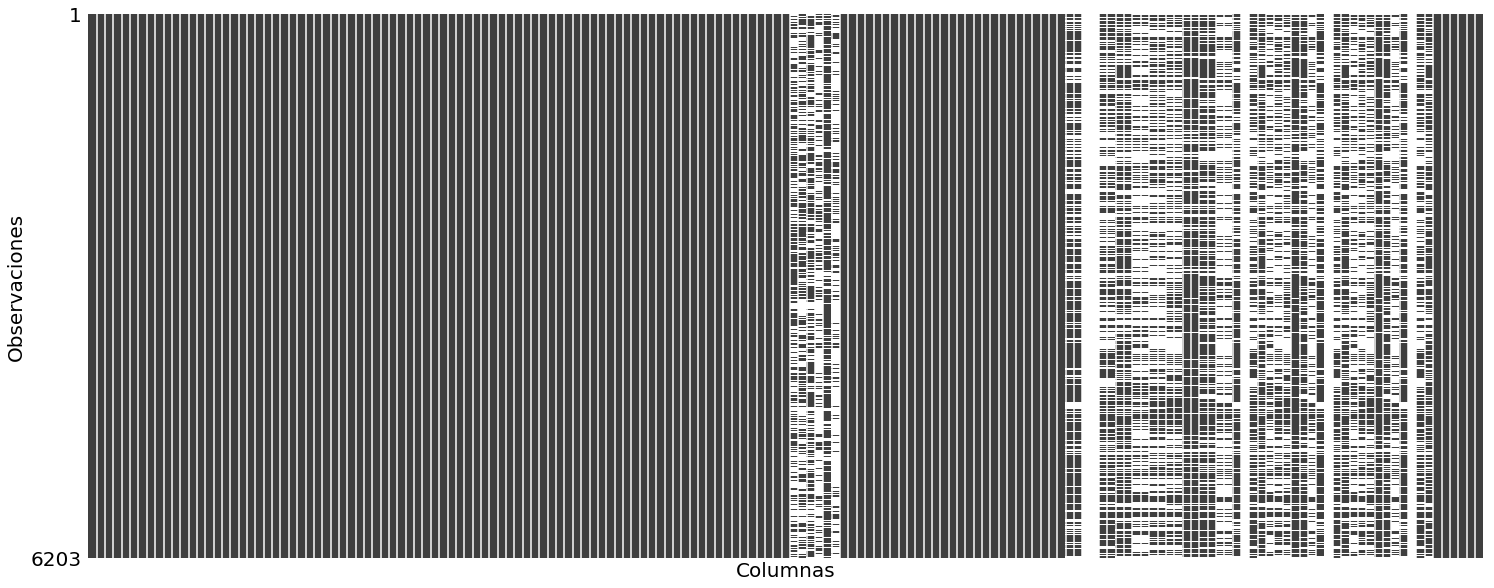

In [12]:
msno.matrix(df_09, fontsize=50, sparkline=False, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

Text(0, 0.5, 'Observaciones')

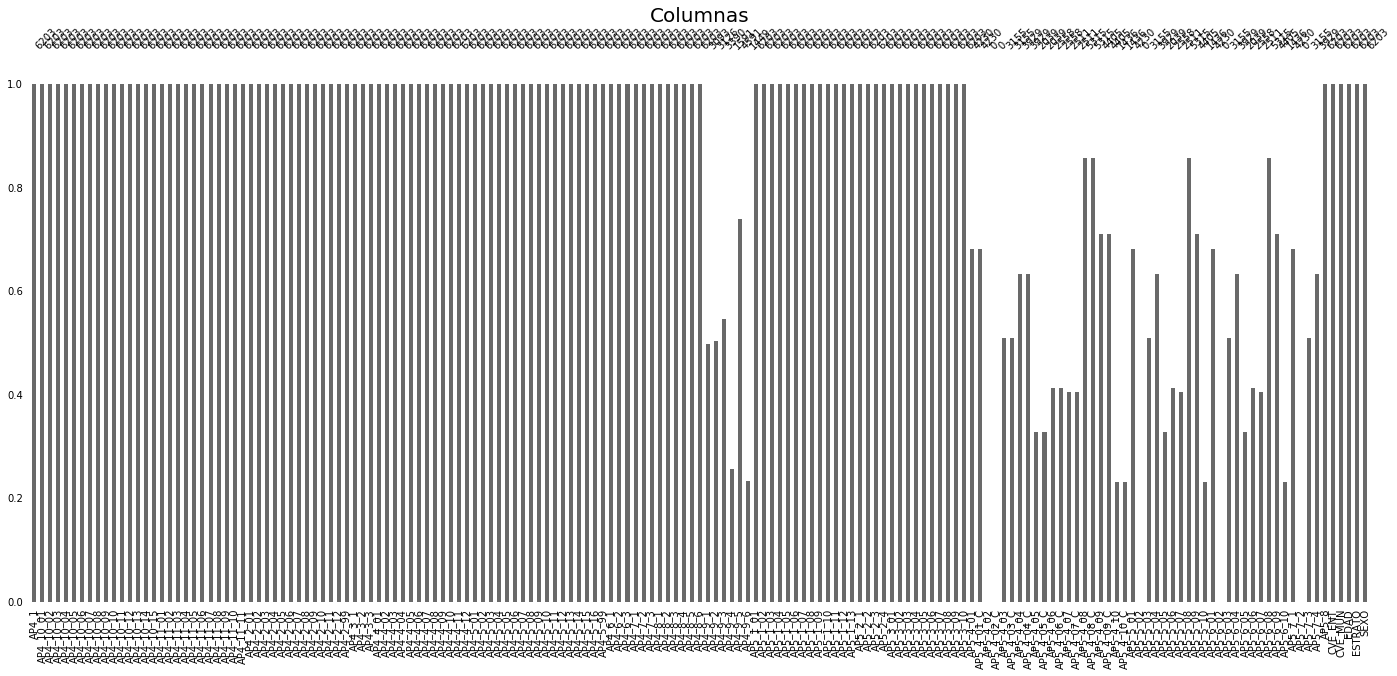

In [13]:
msno.bar(df_09, fontsize=10, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

In [14]:
df_09.replace(to_replace=np.NaN, value=-1, inplace=True)

In [15]:
df_09.columns[df_09.isnull().any()].tolist()

[]

In [16]:
threshold = round(df_09.shape[0]*.8)
threshold

4962

In [17]:
l = []
for column in df_09.columns:
    na_column =  df_09[column].value_counts().get(-1)
    if(na_column != None):
        if (df_09.shape[0] - na_column < threshold):
            print(column, ': ', df_09.shape[0] - na_column, ' - ', threshold, 'd e l e t e d')
            l.append(column)

AP4_9_1 :  3093  -  4962 d e l e t e d
AP4_9_2 :  3126  -  4962 d e l e t e d
AP4_9_3 :  3390  -  4962 d e l e t e d
AP4_9_4 :  1591  -  4962 d e l e t e d
AP4_9_5 :  4591  -  4962 d e l e t e d
AP4_9_6 :  1449  -  4962 d e l e t e d
AP5_4_01 :  4230  -  4962 d e l e t e d
AP5_4_01_C :  4230  -  4962 d e l e t e d
AP5_4_02 :  0  -  4962 d e l e t e d
AP5_4_02_C :  0  -  4962 d e l e t e d
AP5_4_03 :  3155  -  4962 d e l e t e d
AP5_4_03_C :  3155  -  4962 d e l e t e d
AP5_4_04 :  3929  -  4962 d e l e t e d
AP5_4_04_C :  3929  -  4962 d e l e t e d
AP5_4_05 :  2039  -  4962 d e l e t e d
AP5_4_05_C :  2039  -  4962 d e l e t e d
AP5_4_06 :  2558  -  4962 d e l e t e d
AP5_4_06_C :  2558  -  4962 d e l e t e d
AP5_4_07 :  2511  -  4962 d e l e t e d
AP5_4_07_C :  2511  -  4962 d e l e t e d
AP5_4_09 :  4405  -  4962 d e l e t e d
AP5_4_09_C :  4405  -  4962 d e l e t e d
AP5_4_10 :  1436  -  4962 d e l e t e d
AP5_4_10_C :  1436  -  4962 d e l e t e d
AP5_5_01 :  4230  -  4962 d e l e 

In [18]:
df_09.shape

(6203, 167)

In [19]:
df_09.drop(labels=l, axis=1, inplace=True)

In [20]:
df_09.fillna(value=-1, inplace=True)

In [21]:
df_09.replace(to_replace=-1, value=np.NaN, inplace=True)

Text(0, 0.5, 'Observaciones')

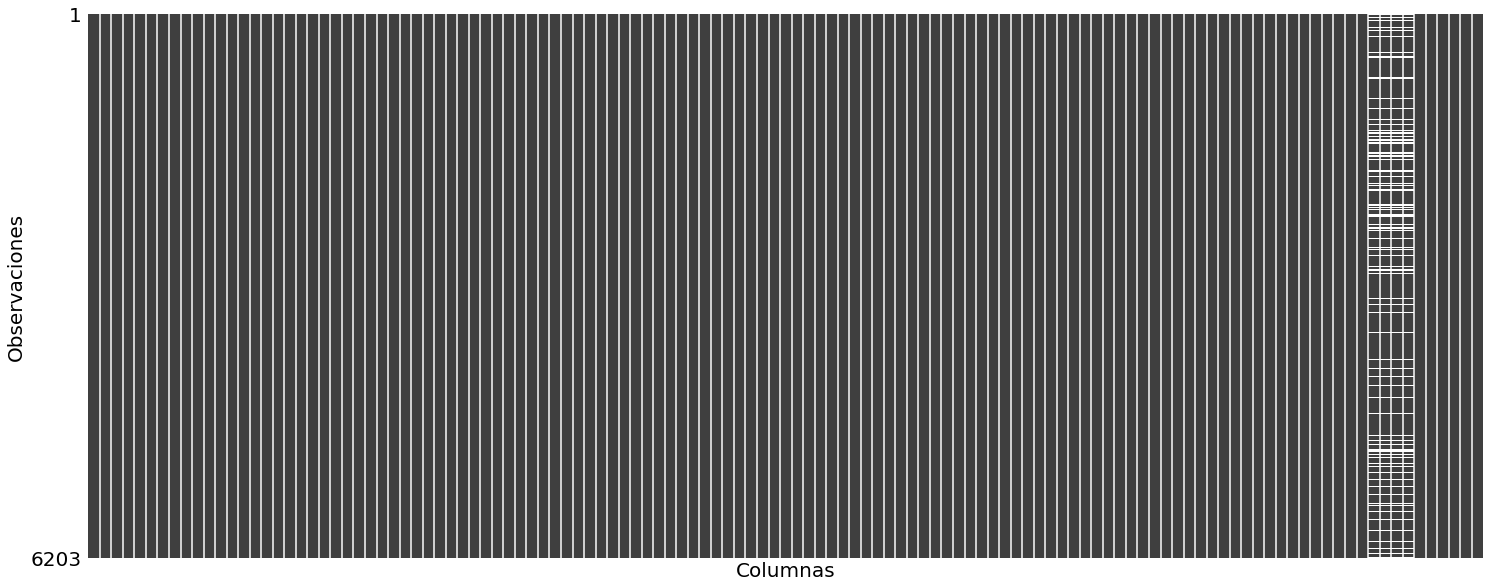

In [22]:
msno.matrix(df_09, fontsize=50, sparkline=False, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

Text(0, 0.5, 'Observaciones')

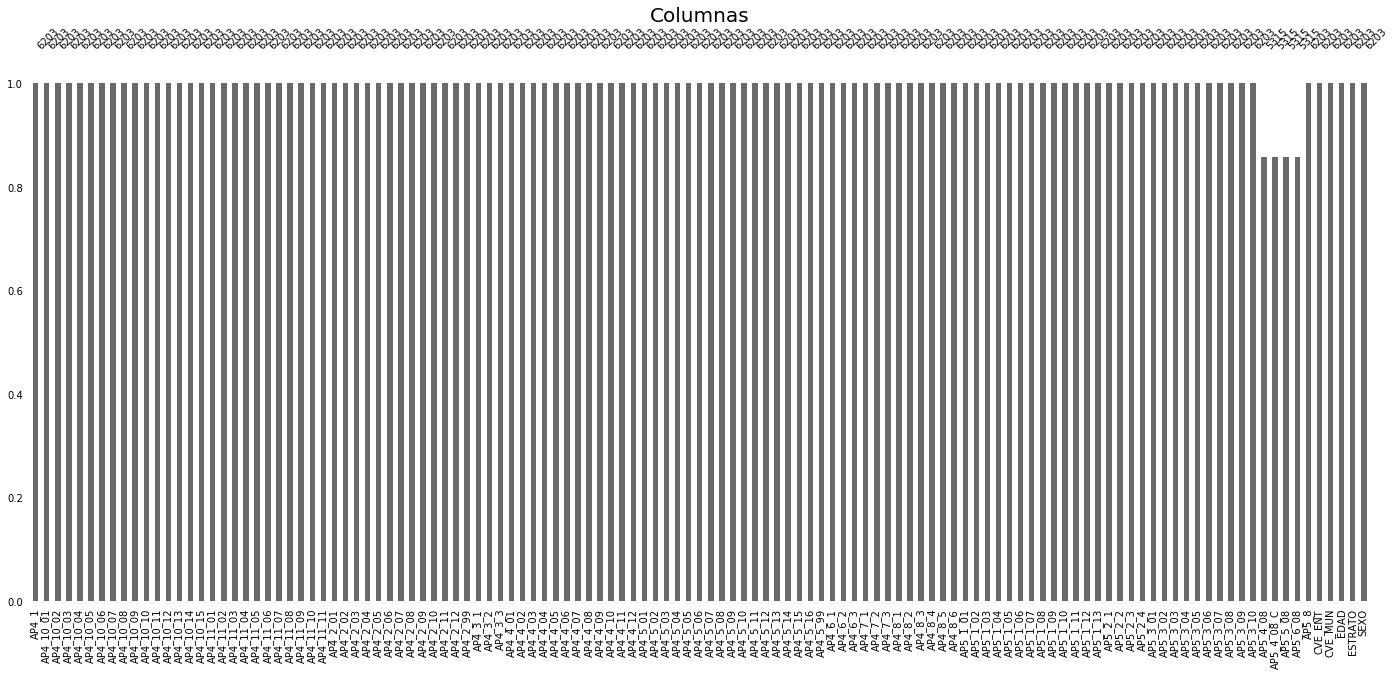

In [23]:
msno.bar(df_09, fontsize=10, labels=False)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Observaciones', fontsize=20)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09.png', dpi=300)

In [24]:
file = "../../../../../../dataframes/envipe/df_09.csv"


In [25]:
df_09.shape

(6203, 121)

In [26]:
df_09.to_csv(file,index = False, header = True, sep = ',', encoding = 'utf-8')